<a href="https://colab.research.google.com/github/Saqlain100/CancerKeras/blob/main/CancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D
import pickle
import numpy as np
import time
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
from sklearn.metrics import roc_auc_score
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [32]:
start = time.time()
# 14.45 min

# load data
K = 9
F = 24
filter_size = 2
D = 48
R = 5
print('K =', K)
filename = 'brca_{0}_new'.format(K)
filename = "/content/drive/MyDrive/S_Data/BRCA/brca_9_new"
with open(filename, 'rb') as fp:
    dataset = pickle.load(fp)

K = 9


In [33]:
input_shape = (dataset[0]['X'].shape[1],dataset[0]['X'].shape[2])

model = Sequential()
model.add(Conv1D(F, filter_size, strides=2, padding='valid',
                 activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(2))
model.add(Conv1D(F, filter_size, padding='same',activation='relu'))
model.add(MaxPooling1D(2))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(D, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.mean_squared_error,
              optimizer='Adam')

y = dataset['labels']
y_scores = np.zeros((5 * R, y.shape[0]))

In [34]:
for j in range(5):
    X = dataset[j]['X']

    for r in range(R):
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            history = model.fit(X_train, y_train, batch_size=8,epochs=11,verbose=0)
            y_scores[j*R+r,test_index] = model.predict(X_test).reshape(-1)

y_true = dataset['labels']
for i in range(5*R-1):
    y_true = np.concatenate((y_true,dataset['labels']))
y_score = y_scores.reshape(-1)

print("Model Accuracy:",roc_auc_score(y_true, y_score))

np.save('y_true_deep_10fold',str(y_true))
np.save('y_score_deep_10fold',y_score)

end = time.time()
print('Total time fot training data:',str((end-start)/60), 'min')

Model Accuracy: 0.9874915997078159
Total time fot training data: 1.1361167073249816 min


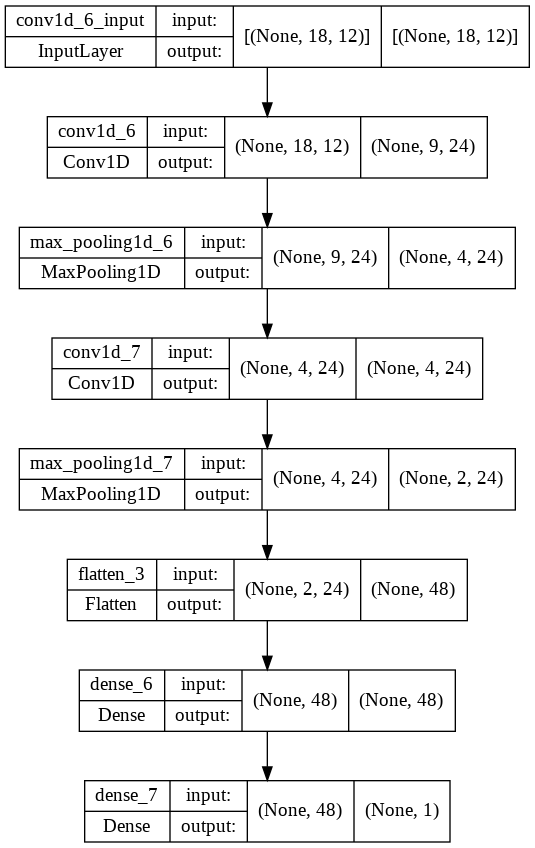

In [35]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


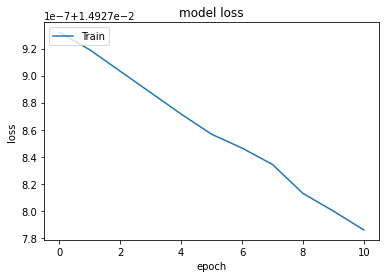

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()